## 1. Import Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Text processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Naive Bayes models
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## 2. Download and Load Data

In [139]:
import urllib.request
import zipfile
import os
# Download the dataset
url = 'https://raw.githubusercontent.com/cudnah124/Natural-Language-Processing/main/lab4/archive.zip'
zip_path = 'archive.zip'

print("Downloading dataset...")
urllib.request.urlretrieve(url, zip_path)
print("Download complete!")

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')
print("Extraction complete!")

Download complete!
Extraction complete!


In [140]:
# List files in the extracted folder
for root, dirs, files in os.walk('data'):
    for file in files:
        print(os.path.join(root, file))

data/spam_ham_dataset.csv


In [141]:
csv_files = []
for root, dirs, files in os.walk('data'):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print("Found CSV files:", csv_files)

# Load the first CSV file found
if csv_files:
    df = pd.read_csv(csv_files[0], encoding='latin-1')
    print(f"Loaded: {csv_files[0]}")

Found CSV files: ['data/spam_ham_dataset.csv']
Loaded: data/spam_ham_dataset.csv


## 3. Exploratory Data Analysis (EDA)

In [142]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [143]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [144]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [145]:
df = df[['label_num', 'text']]
print(df.shape)
print(df.head())

(5171, 2)
   label_num                                               text
0          0  Subject: enron methanol ; meter # : 988291\r\n...
1          0  Subject: hpl nom for january 9 , 2001\r\n( see...
2          0  Subject: neon retreat\r\nho ho ho , we ' re ar...
3          1  Subject: photoshop , windows , office . cheap ...
4          0  Subject: re : indian springs\r\nthis deal is t...


Class distribution:
label_num
0    3672
1    1499
Name: count, dtype: int64


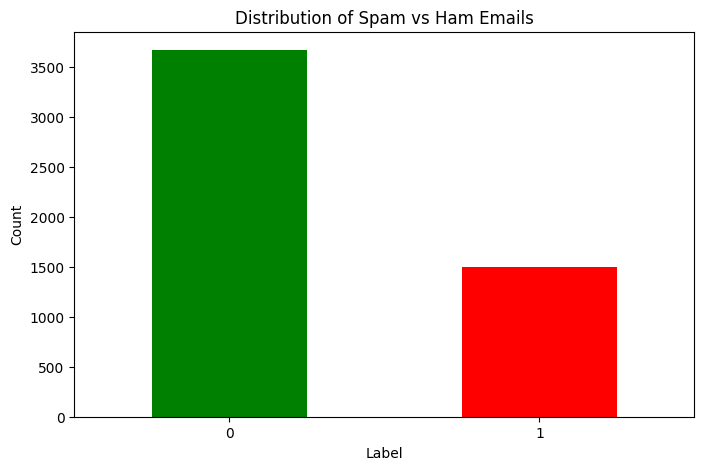

In [146]:
# Check class distribution
print("Class distribution:")
print(df['label_num'].value_counts())

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['label_num'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Spam vs Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 4. Data Preprocessing

In [147]:
# Split data into features and target
X = df['text']
y = df['label_num']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"\nTraining set label distribution:")
print(y_train.value_counts())
print(f"\nTesting set label distribution:")
print(y_test.value_counts())

Training set size: 4136
Testing set size: 1035

Training set label distribution:
label_num
0    2937
1    1199
Name: count, dtype: int64

Testing set label distribution:
label_num
0    735
1    300
Name: count, dtype: int64


## 5. Feature Extraction

### 5.1 Count Vectorizer (Bag of Words)

In [148]:
# Create Count Vectorizer
count_vectorizer = CountVectorizer(max_features=20000, stop_words='english', lowercase=True, token_pattern=r'\b[a-z]+\b')

# Fit and transform training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform testing data
X_test_count = count_vectorizer.transform(X_test)

print(f"Count Vectorizer - Training set shape: {X_train_count.shape}")
print(f"Count Vectorizer - Testing set shape: {X_test_count.shape}")

Count Vectorizer - Training set shape: (4136, 20000)
Count Vectorizer - Testing set shape: (1035, 20000)


### 5.2 TF-IDF Vectorizer

In [149]:
# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20000, stop_words='english',lowercase=True, token_pattern=r'\b[a-z]+\b')

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Vectorizer - Training set shape: {X_train_tfidf.shape}")
print(f"TF-IDF Vectorizer - Testing set shape: {X_test_tfidf.shape}")

TF-IDF Vectorizer - Training set shape: (4136, 20000)
TF-IDF Vectorizer - Testing set shape: (1035, 20000)


## 6. Model Training - Naive Bayes

### 6.1 Multinomial Naive Bayes with Count Vectorizer

In [150]:
# Train Multinomial Naive Bayes with Count Vectorizer
mnb_count = MultinomialNB()
mnb_count.fit(X_train_count, y_train)

# Make predictions
y_pred_mnb_count = mnb_count.predict(X_test_count)

# Evaluate
print("Multinomial Naive Bayes with Count Vectorizer:")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb_count):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mnb_count):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mnb_count):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_mnb_count):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb_count, target_names=['Ham', 'Spam']))

Multinomial Naive Bayes with Count Vectorizer:
Accuracy: 0.9739
Precision: 0.9535
Recall: 0.9567
F1-Score: 0.9551

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       735
        Spam       0.95      0.96      0.96       300

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



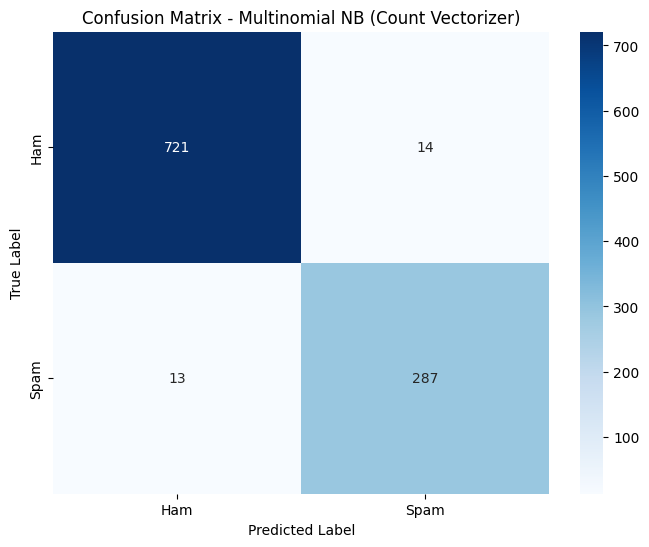

In [151]:
# Confusion Matrix
cm_mnb_count = confusion_matrix(y_test, y_pred_mnb_count)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb_count, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Multinomial NB (Count Vectorizer)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 6.2 Multinomial Naive Bayes with TF-IDF

In [152]:
# Train Multinomial Naive Bayes with TF-IDF
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_mnb_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluate
print("Multinomial Naive Bayes with TF-IDF:")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb_tfidf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mnb_tfidf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mnb_tfidf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_mnb_tfidf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb_tfidf, target_names=['Ham', 'Spam']))

Multinomial Naive Bayes with TF-IDF:
Accuracy: 0.9546
Precision: 0.9922
Recall: 0.8500
F1-Score: 0.9156

Classification Report:
              precision    recall  f1-score   support

         Ham       0.94      1.00      0.97       735
        Spam       0.99      0.85      0.92       300

    accuracy                           0.95      1035
   macro avg       0.97      0.92      0.94      1035
weighted avg       0.96      0.95      0.95      1035



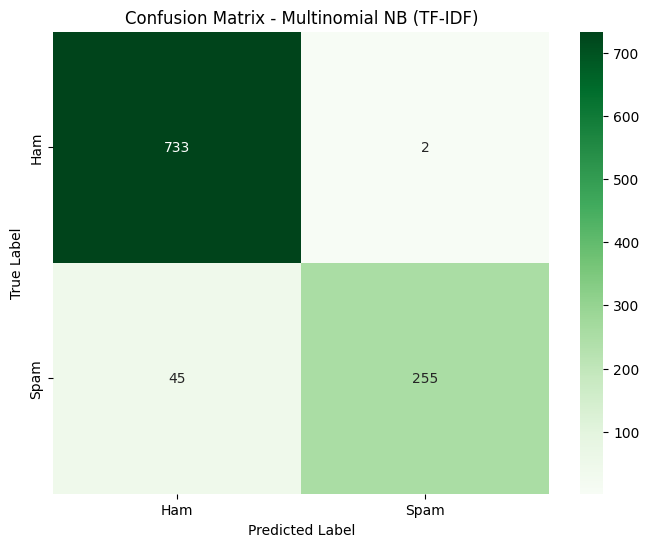

In [153]:
# Confusion Matrix
cm_mnb_tfidf = confusion_matrix(y_test, y_pred_mnb_tfidf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb_tfidf, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Multinomial NB (TF-IDF)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 6.3 Bernoulli Naive Bayes

In [154]:
# Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_count, y_train)

# Make predictions
y_pred_bnb = bnb.predict(X_test_count)

# Evaluate
print("Bernoulli Naive Bayes:")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_bnb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_bnb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_bnb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_bnb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bnb, target_names=['Ham', 'Spam']))

Bernoulli Naive Bayes:
Accuracy: 0.8676
Precision: 0.9055
Recall: 0.6067
F1-Score: 0.7265

Classification Report:
              precision    recall  f1-score   support

         Ham       0.86      0.97      0.91       735
        Spam       0.91      0.61      0.73       300

    accuracy                           0.87      1035
   macro avg       0.88      0.79      0.82      1035
weighted avg       0.87      0.87      0.86      1035



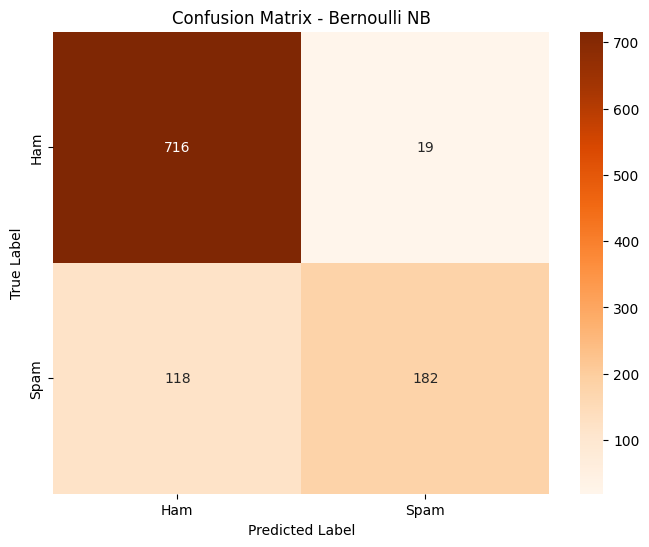

In [155]:
# Confusion Matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Oranges', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Bernoulli NB')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 7. Model Comparison

Model Performance Comparison:
                  Model  Accuracy  Precision   Recall  F1-Score
 Multinomial NB (Count)  0.973913   0.953488 0.956667  0.955075
Multinomial NB (TF-IDF)  0.954589   0.992218 0.850000  0.915619
           Bernoulli NB  0.867633   0.905473 0.606667  0.726547


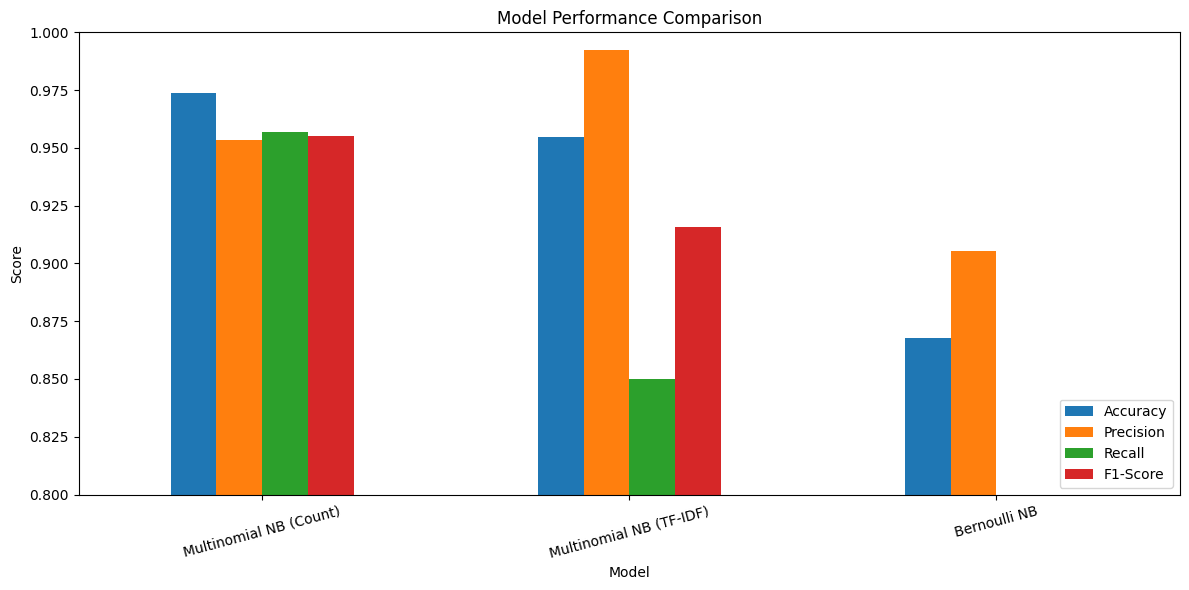

In [156]:
# Compare all models
models_comparison = pd.DataFrame({
    'Model': ['Multinomial NB (Count)', 'Multinomial NB (TF-IDF)', 'Bernoulli NB'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_mnb_count),
        accuracy_score(y_test, y_pred_mnb_tfidf),
        accuracy_score(y_test, y_pred_bnb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_mnb_count),
        precision_score(y_test, y_pred_mnb_tfidf),
        precision_score(y_test, y_pred_bnb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_mnb_count),
        recall_score(y_test, y_pred_mnb_tfidf),
        recall_score(y_test, y_pred_bnb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_mnb_count),
        f1_score(y_test, y_pred_mnb_tfidf),
        f1_score(y_test, y_pred_bnb)
    ]
})

print("Model Performance Comparison:")
print("="*80)
print(models_comparison.to_string(index=False))

# Visualize comparison
models_comparison.set_index('Model').plot(kind='bar', figsize=(12, 6), rot=15)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()